# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

Melakukan Web Scrapping untuk menganalisis pergerakan kurs US Dollar ke Rupiah dari bulan oktober  2022 - Maret 2023

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

Melakukan request ke URL

In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

Melihat hasil html yang diambil dari request url

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR exchange rate history</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="http'

Memangil Library BeautifulSoup untuk merapihkan hasil HTML di atas dan Melakukan Parsing HTML menggunakan BeautifulSoup

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

Memanggil Tag HTML yang sudah dipercantik dengan Library BeautifulSoup

In [4]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<!--[if lt IE 9]>
<html class="no-js ie8 oldie" lang="en" xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   USD to IDR exchange rate history
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
  <meta charset="utf-8">
   <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
   


## Finding the right key to scrap the data & Extracting the right information

Find di sini digunakan untuk mencari element yang diinginkan, karena disini kita ingin mengambil data dari table, maka kita cari tag yang merangkap semua table.
Kita cukup memangil tag tbody untuk mencari data yang kita inginkan.


In [5]:
table = soup.find('tbody')
print(table.prettify()[1:500])


tbody>
 <tr>
  <td>
   <a class="w" href="/exchange-rate-history/usd-idr-2023-04-12">
    April 12, 2023
   </a>
   <a class="n" href="/exchange-rate-history/usd-idr-2023-04-12">
    2023-4-12
   </a>
  </td>
  <td>
   <span class="w">
    <span class="nowrap">
     <span class="currencySymbol">
      $
     </span>
     1 =
    </span>
    <span class="nowrap">
     <span class="currencySymbol">
      Rp
     </span>
     14,835
    </span>
   </span>
   <span class="n">
    <span class="nowra


Mencari row length.

In [6]:
tgl=table.find_all('a',attrs={'class':'n'})
row_length = len(tgl)
row_length

129

Melakukan pengambilan data 

Disini digunakan perulangan (looping) untuk menarik data, jadi looping digunakan untuk mengulangi sebuah proses secara otomatis untuk mengambil data dari halaman web yang sama.

In [7]:
temp = [] #initiating a tuple

for i in range(0, row_length):

    #scrapping process
    tgl=table.find_all('a',attrs={'class':'n'})[i].text
    harga=table.find_all('span',attrs={'class':'w'})[i].text
    
    temp.append((tgl,harga.replace('$1 = Rp', '').replace(',', '').strip())) 
    
temp 

[('2023-4-12', '14835'),
 ('2023-4-11', '14915'),
 ('2023-4-10', '14950'),
 ('2023-4-7', '14941'),
 ('2023-4-6', '14931'),
 ('2023-4-5', '14960'),
 ('2023-4-4', '14957'),
 ('2023-4-3', '14922'),
 ('2023-3-31', '14969'),
 ('2023-3-30', '15024'),
 ('2023-3-29', '15034'),
 ('2023-3-28', '15060'),
 ('2023-3-27', '15107'),
 ('2023-3-24', '15165'),
 ('2023-3-23', '15085'),
 ('2023-3-22', '15253'),
 ('2023-3-21', '15301'),
 ('2023-3-20', '15343'),
 ('2023-3-17', '15375'),
 ('2023-3-16', '15429'),
 ('2023-3-15', '15459'),
 ('2023-3-14', '15380'),
 ('2023-3-13', '15416'),
 ('2023-3-10', '15503'),
 ('2023-3-9', '15495'),
 ('2023-3-8', '15449'),
 ('2023-3-7', '15429'),
 ('2023-3-6', '15354'),
 ('2023-3-3', '15278'),
 ('2023-3-2', '15322'),
 ('2023-3-1', '15249'),
 ('2023-2-28', '15241'),
 ('2023-2-27', '15216'),
 ('2023-2-24', '15265'),
 ('2023-2-23', '15211'),
 ('2023-2-22', '15197'),
 ('2023-2-21', '15235'),
 ('2023-2-20', '15168'),
 ('2023-2-17', '15166'),
 ('2023-2-16', '15144'),
 ('2023-2-15

## Creating data frame & Data wrangling

Memasukkan array kedalam kerangka data

Mengimport pandas dan membuat data frame dari data yang sudah di tarik dari web

In [8]:
import pandas as pd

df = pd.DataFrame(temp, columns=('tgl','harga'))
df.head()

,tgl,harga
0,2023-4-12,14835
1,2023-4-11,14915
2,2023-4-10,14950
3,2023-4-7,14941
4,2023-4-6,14931


Menampilkan tipe data dari data frame

In [9]:
df.dtypes

tgl      object
harga    object
dtype: object

Melakukan Data Cleaning
atau merapihkan data, membuat data yang dimiliki memiliki penulisan atau tipe data yang tepat

In [10]:
df['tgl'] = pd.to_datetime(df['tgl'])
df['harga']=df['harga'].astype(int)
df["tgl"].dt.to_period('M')
df.dtypes

tgl      datetime64[ns]
harga             int32
dtype: object

Melakukan Visualisasi Data
pertama-tama menjadikan kolom tanggal sebagai index data frame
kemudian membuat visualisasi dengan plot, karena tgl sudah dijadikan index maka visualisasi yang dibuat adalah pergerakan kurs USD berdasarkan tanggal

<AxesSubplot:xlabel='tgl'>

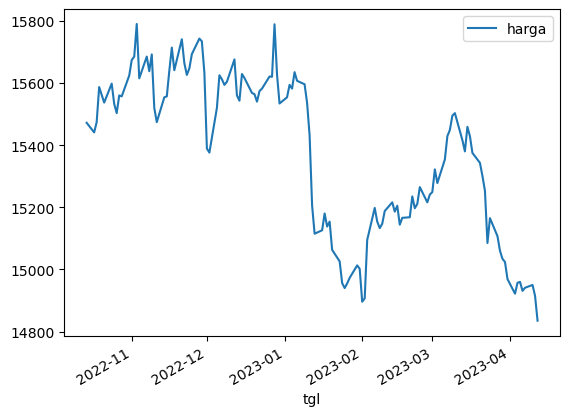

In [11]:
df = df.set_index('tgl')
df.plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:xlabel='tgl'>

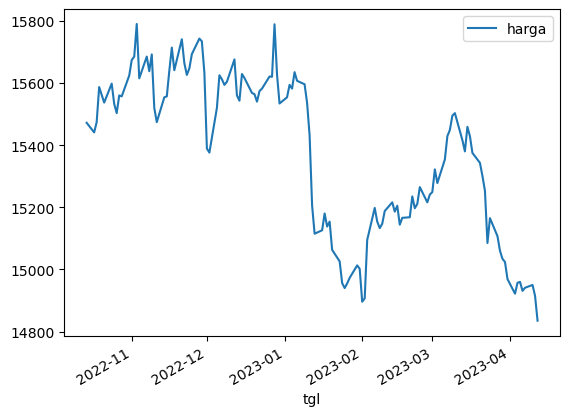

In [12]:
df.plot()


dari hasil web scrapping dan analisa dapat disimpulkan bahwa kurs USD terhadap IDR mengalami fluktuasi yang signifikan, di bulan oktober 2022 terdapat kenaikan dan di awal tahun 2023 mengalami penurunan yg cukup besar. Meskipun terdapat fluktuasi harian yang signifikan, tren jangka panjang dari kurs USD cenderung mengalami penurunan dalam jangka waktu yang panjang. 

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.